In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [211]:
r = np.linspace(15, 4000, 5000)
# r = np.logspace(1.5, 3.2, 50)
amin = r[0]
amax = r[-1]
rmin = max(amin - 0.5 * (r[1] - amin), 0)
rmax = amax + 0.5 * (amax - r[-2])

redges = 0.5 * (r[:-1] + r[1:])
redges = np.concatenate(([rmin], redges, [rmax]))

abins = np.pi * (redges[1:]**2 - redges[:-1]**2)
acum = np.cumsum(abins)
acum2 = np.pi * r**2
abins2 = np.concatenate(([acum[0]], np.diff(acum2)))

mD = 26000
alpha = 1
sigma0 = mD / (2 * np.pi) * (alpha + 2) / (rmax**(alpha + 2) - rmin**(alpha + 2))

def dM(r1, r2, alpha=1, sigma0=sigma0):
    return 2 * np.pi * sigma0  / (alpha + 2) * (r2**(alpha + 2) - r1**(alpha + 2))
    # return r2**(alpha + 2) - r1**(alpha + 2)

# La masa entre los puntos es de:
# mbin = dM(r[:-1], r[1:], alpha=alpha, sigma0=1)

mbins = dM(redges[:-1], redges[1:], alpha=alpha, sigma0=sigma0)
# mbins = mbins/mbins.sum()*mD
mbins2 = r**alpha * abins
mbins2 = mbins2/mbins2.sum()*mD
mcum = np.cumsum(mbins)
mcum2 = np.cumsum(mbins2)

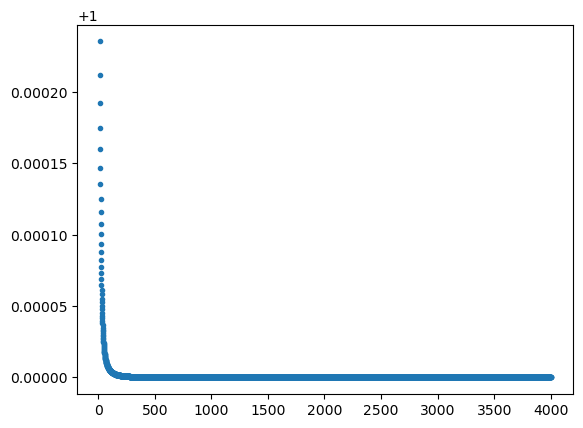

In [212]:
plt.plot(r, mbins/mbins2, ".")

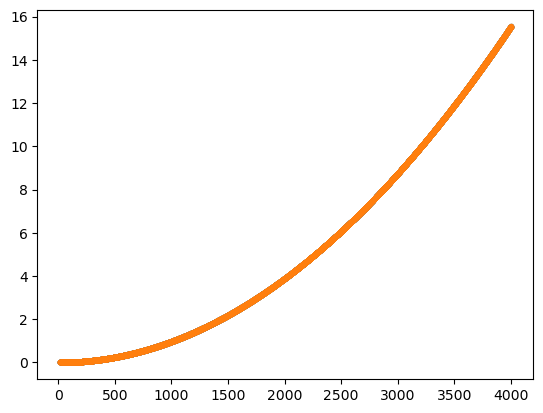

In [213]:
plt.plot(r, mbins, ".")
plt.plot(r, mbins2, ".")

[]

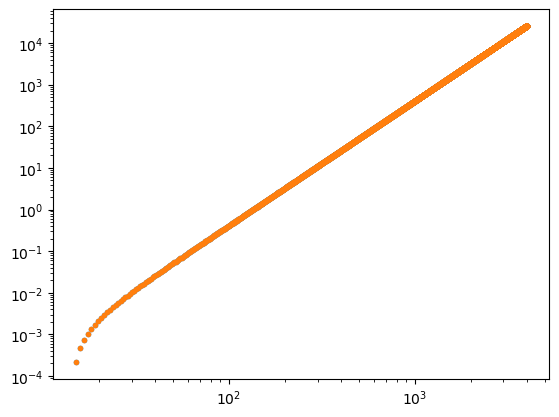

In [214]:
plt.plot(r, mcum, ".")
plt.plot(r, mcum2, ".")
plt.semilogx()
plt.semilogy()

[]

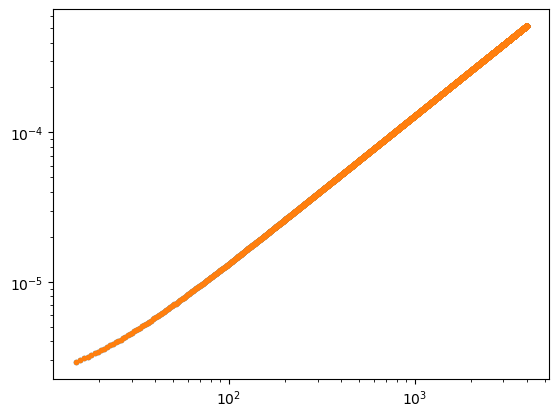

In [215]:
plt.plot(r, (mcum/acum), ".")
plt.plot(r, (mcum2/acum), ".")
plt.semilogx()
plt.semilogy()

[]

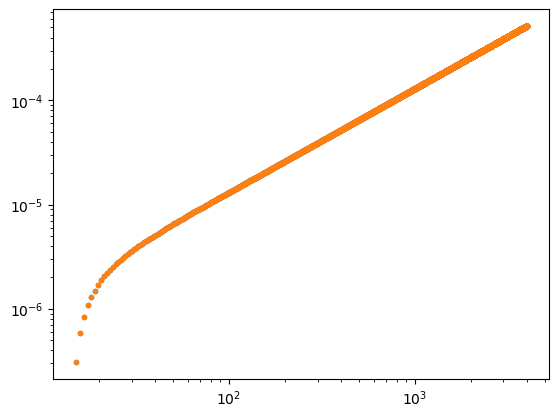

In [216]:
plt.plot(r, (mcum/acum2), ".")
plt.plot(r, (mcum2/acum2), ".")
plt.semilogx()
plt.semilogy()

[]

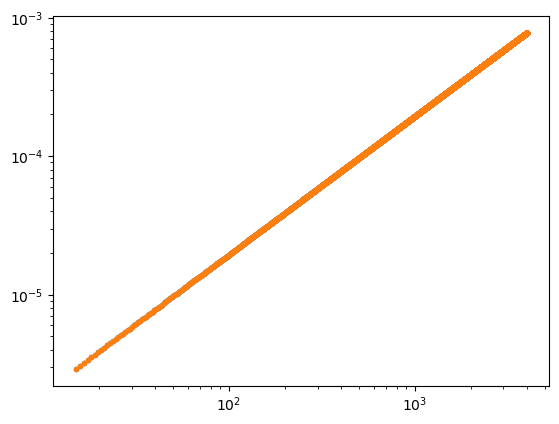

In [217]:
plt.plot(r, (mbins/abins), ".")
plt.plot(r, (mbins2/abins), ".")
plt.semilogx()
plt.semilogy()

[]

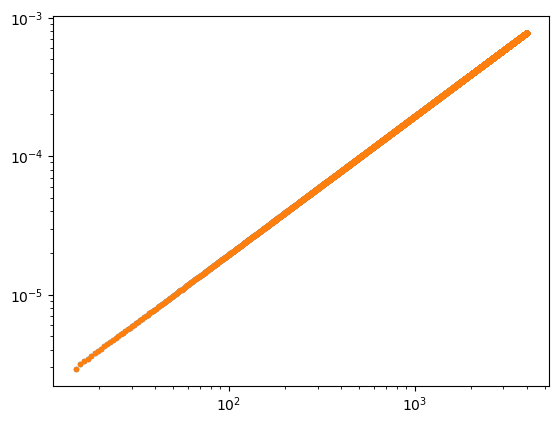

In [218]:
plt.plot(r, (mbins/abins2), ".")
plt.plot(r, (mbins2/abins2), ".")
plt.semilogx()
plt.semilogy()

In [219]:
def Lines2015(r, alpha, Rgap=1, ratio=0.1):
    fgap = 1 / (1 + np.exp(- (r - Rgap) / (Rgap * ratio)))
    sigma = fgap * r**alpha
    return sigma

In [223]:
sigma3 = Lines2015(r, alpha, Rgap=rmin, ratio=0.01)
mbins3 = sigma3 * abins
mbins3 = mbins3/mbins3.sum()*mD
mcum3 = np.cumsum(mbins3)

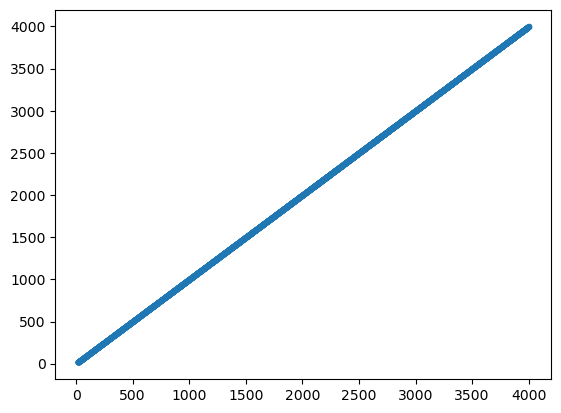

In [224]:
plt.plot(r, sigma3, ".")

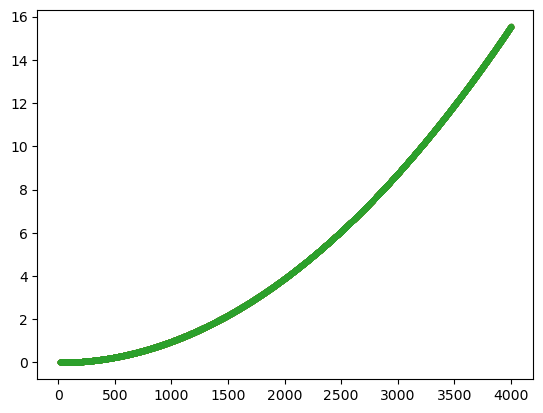

In [225]:
plt.plot(r, mbins, ".")
plt.plot(r, mbins2, ".")
plt.plot(r, mbins3, ".")